In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
npf = pd.read_csv('npf_train.csv')
npf.index=npf['date']
npf['class4'] = npf['class4'].astype('category')
npf.drop(['id', 'partlybad', 'date'], axis=1, inplace=True)
npf.rename(columns={'class4':'class'}, inplace=True)
npf.head()

,class,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,Glob.mean,...,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,nonevent,384.462000,2.284996,384.164462,2.135062,385.274688,2.211695,383.885077,1.955198,19.245511,...,-13.016471,0.525698,-12.422972,0.376324,1.635563,0.856948,0.026438,0.014617,0.003374,0.000733
2000-01-20,nonevent,374.884615,0.415185,374.703333,0.385179,375.621266,0.665720,374.674177,0.435480,31.107659,...,-8.997430,0.373927,-8.351043,0.575679,1.441109,0.741088,0.022649,0.012479,0.001501,0.000572
2000-01-23,nonevent,373.496585,0.189497,373.382593,0.172958,373.961481,0.235107,373.275062,0.165500,29.800885,...,-10.224472,0.965988,-9.651155,1.238891,2.677545,1.261612,0.044759,0.023748,0.000764,0.000048
2000-02-17,nonevent,378.600367,1.934180,378.464862,1.946536,379.785872,2.865022,378.316909,1.983430,23.795211,...,-1.535183,0.122651,-0.829524,0.134191,2.261805,1.345651,0.030893,0.021903,0.002038,0.000751
2000-03-25,Ib,373.128684,1.096617,372.980000,1.047750,373.701830,1.259198,372.910000,1.004164,252.480327,...,-2.095641,1.695622,-1.095864,2.090111,12.906779,7.022300,0.333523,0.239981,0.000662,0.000210


In [3]:
binary = npf.copy()
new_class = np.array(['event']*len(binary), dtype='object')
new_class[binary['class'] == 'nonevent'] = 'nonevent'
binary['class2'] = new_class
binary.drop('class', axis=1, inplace=True)
binary.rename(columns={'class2':'class'}, inplace=True)
binary.head()

,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,Glob.mean,Glob.std,...,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std,class
date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,384.462000,2.284996,384.164462,2.135062,385.274688,2.211695,383.885077,1.955198,19.245511,11.909549,...,0.525698,-12.422972,0.376324,1.635563,0.856948,0.026438,0.014617,0.003374,0.000733,nonevent
2000-01-20,374.884615,0.415185,374.703333,0.385179,375.621266,0.665720,374.674177,0.435480,31.107659,24.624718,...,0.373927,-8.351043,0.575679,1.441109,0.741088,0.022649,0.012479,0.001501,0.000572,nonevent
2000-01-23,373.496585,0.189497,373.382593,0.172958,373.961481,0.235107,373.275062,0.165500,29.800885,22.892316,...,0.965988,-9.651155,1.238891,2.677545,1.261612,0.044759,0.023748,0.000764,0.000048,nonevent
2000-02-17,378.600367,1.934180,378.464862,1.946536,379.785872,2.865022,378.316909,1.983430,23.795211,16.178905,...,0.122651,-0.829524,0.134191,2.261805,1.345651,0.030893,0.021903,0.002038,0.000751,nonevent
2000-03-25,373.128684,1.096617,372.980000,1.047750,373.701830,1.259198,372.910000,1.004164,252.480327,138.921953,...,1.695622,-1.095864,2.090111,12.906779,7.022300,0.333523,0.239981,0.000662,0.000210,event


In [11]:
#Binary SVM

features = binary.drop('class', axis=1)
target = binary['class']

k = 10
kf = KFold(n_splits=k, shuffle=True)
accuracies = list()
for train_index, test_index in kf.split(features):
    features_train = features.iloc[train_index]
    features_test = features.iloc[test_index]
    target_train = target.iloc[train_index]
    target_test = target.iloc[test_index]
    
    model = SVC(kernel='linear')
    model.fit(features_train, target_train)
    accuracies.append(model.score(features_test, target_test))
binary_SVM = np.array(accuracies).mean()
print(binary_SVM)

0.8208212560386473


In [12]:
#Multiclass SVM

features = npf.drop('class', axis=1)
target = npf['class']

k = 10
kf = KFold(n_splits=k, shuffle=True)
accuracies = list()
for train_index, test_index in kf.split(features):
    features_train = features.iloc[train_index]
    features_test = features.iloc[test_index]
    target_train = target.iloc[train_index]
    target_test = target.iloc[test_index]
    
    model = SVC(kernel='linear')
    model.fit(features_train, target_train)
    accuracies.append(model.score(features_test, target_test))
multiclass_SVM = np.array(accuracies).mean()
print(multiclass_SVM)

0.6008212560386473


In [5]:
#Binary Gaussian Naive Bayes

features = binary.drop('class', axis=1)
target = binary['class']

k = 10
kf = KFold(n_splits=k, shuffle=True)
accuracies = list()
for train_index, test_index in kf.split(features):
    features_train = features.iloc[train_index]
    features_test = features.iloc[test_index]
    target_train = target.iloc[train_index]
    target_test = target.iloc[test_index]
    
    model = GaussianNB()
    model.fit(features_train, target_train)
    accuracies.append(model.score(features_test, target_test))
binary_GNB = np.array(accuracies).mean()
print(binary_GNB)

0.7814975845410628


In [4]:
#Multiclass Gaussian Naive Bayes

features = npf.drop('class', axis=1)
target = npf['class']

k = 10
kf = KFold(n_splits=k, shuffle=True)
accuracies = list()
for train_index, test_index in kf.split(features):
    features_train = features.iloc[train_index]
    features_test = features.iloc[test_index]
    target_train = target.iloc[train_index]
    target_test = target.iloc[test_index]
    
    model = GaussianNB()
    model.fit(features_train, target_train)
    accuracies.append(model.score(features_test, target_test))
multiclass_GNB = np.array(accuracies).mean()
print(multiclass_GNB)

0.5416908212560385


In [6]:
#Multiclass Dummy Classifier

features = npf.drop('class', axis=1)
target = npf['class']

k = 10
kf = KFold(n_splits=k, shuffle=True)
accuracies = list()
for train_index, test_index in kf.split(features):
    features_train = features.iloc[train_index]
    features_test = features.iloc[test_index]
    target_train = target.iloc[train_index]
    target_test = target.iloc[test_index]
    
    model = DummyClassifier(strategy='most_frequent')
    model.fit(features_train, target_train)
    accuracies.append(model.score(features_test, target_test))
multiclass_dummy = np.array(accuracies).mean()
print(multiclass_dummy)

0.500048309178744


In [7]:
#Binary Dummy Classifier

features = binary.drop('class', axis=1)
target = binary['class']

k = 10
kf = KFold(n_splits=k, shuffle=True)
accuracies = list()
for train_index, test_index in kf.split(features):
    features_train = features.iloc[train_index]
    features_test = features.iloc[test_index]
    target_train = target.iloc[train_index]
    target_test = target.iloc[test_index]
    
    model = DummyClassifier(strategy='most_frequent')
    model.fit(features_train, target_train)
    accuracies.append(model.score(features_test, target_test))
binary_dummy = np.array(accuracies).mean()
print(binary_dummy)

0.4585990338164251


In [8]:
#Multiclass k-Nearest Neighbors Classifier

features = npf.drop('class', axis=1)
target = npf['class']

k = 10
kf = KFold(n_splits=k, shuffle=True)
max_neighbors = 20
multiclass_kNN_acc = list()
for i in range(max_neighbors):
    accuracies = list()
    for train_index, test_index in kf.split(features):
        features_train = features.iloc[train_index]
        features_test = features.iloc[test_index]
        target_train = target.iloc[train_index]
        target_test = target.iloc[test_index]

        model = KNeighborsClassifier(n_neighbors=i+1)
        model.fit(features_train, target_train)
        accuracies.append(model.score(features_test, target_test))
    multiclass_kNN_acc.append(np.array(accuracies).mean())

multiclass_kNN = pd.DataFrame()
multiclass_kNN['Neighbors'] = range(1, max_neighbors+1)
multiclass_kNN['Accuracy'] = multiclass_kNN_acc
multiclass_kNN.index = multiclass_kNN['Neighbors']
multiclass_kNN.drop('Neighbors', axis=1, inplace=True)
multiclass_kNN = multiclass_kNN.sort_values(by='Accuracy', ascending=False)
multiclass_kNN

,Accuracy
Neighbors,
14,0.604541
6,0.598309
13,0.593816
5,0.589662
7,0.589227
12,0.587295
8,0.585169
4,0.584976
19,0.584928


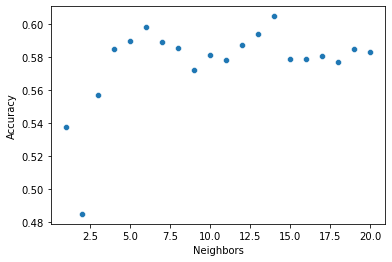

In [24]:
plt.clf()
sns.scatterplot(data=multiclass_kNN, x='Neighbors', y='Accuracy')
plt.show()

In [9]:
#Binary k-Nearest Neighbors Classifier

features = binary.drop('class', axis=1)
target = binary['class']

k = 10
kf = KFold(n_splits=k, shuffle=True)
max_neighbors = 20
binary_kNN_acc = list()
for i in range(max_neighbors):
    accuracies = list()
    for train_index, test_index in kf.split(features):
        features_train = features.iloc[train_index]
        features_test = features.iloc[test_index]
        target_train = target.iloc[train_index]
        target_test = target.iloc[test_index]

        model = KNeighborsClassifier(n_neighbors=i+1)
        model.fit(features_train, target_train)
        accuracies.append(model.score(features_test, target_test))
    binary_kNN_acc.append(np.array(accuracies).mean())

binary_kNN = pd.DataFrame()
binary_kNN['Neighbors'] = range(1, max_neighbors+1)
binary_kNN['Accuracy'] = binary_kNN_acc
binary_kNN.index = binary_kNN['Neighbors']
binary_kNN.drop('Neighbors', axis=1, inplace=True)
binary_kNN = binary_kNN.sort_values(by='Accuracy', ascending=False)
binary_kNN

,Accuracy
Neighbors,
9,0.792512
11,0.790580
8,0.790531
10,0.790483
17,0.790290
5,0.788164
14,0.788068
20,0.785894
12,0.785845


In [10]:
#Binary Perceptron

features = binary.drop('class', axis=1)
target = binary['class']

k = 10
kf = KFold(n_splits=k, shuffle=True)
accuracies = list()
for train_index, test_index in kf.split(features):
    features_train = features.iloc[train_index]
    features_test = features.iloc[test_index]
    target_train = target.iloc[train_index]
    target_test = target.iloc[test_index]

    model = Perceptron()
    model.fit(features_train, target_train)
    accuracies.append(model.score(features_test, target_test))

binary_perceptron = np.array(accuracies).mean()
print(binary_perceptron)

0.666280193236715


In [11]:
#Chained Binary Perceptron

k = 10
kf = KFold(n_splits=k, shuffle=True)
accuracies = list()

for train_index, test_index in kf.split(npf):
    train = npf.iloc[train_index]
    test = npf.iloc[test_index]
    
    EvNE_train = train.copy()
    temp = np.array(['event']*len(EvNE_train), dtype='object')
    temp[EvNE_train['class'] == 'nonevent'] = 'nonevent'
    EvNE_train['class'] = temp
    
    IvII_train = train.copy()
    IvII_train = IvII_train[IvII_train['class'] != 'nonevent']
    temp = np.array(['Type I']*len(IvII_train), dtype='object')
    temp[IvII_train['class'] == 'II'] = 'II'
    IvII_train['class'] = temp
    
    AvB_train = train.copy()
    AvB_train = AvB_train[(AvB_train['class'] == 'Ia') | (AvB_train['class'] == 'Ib')]
    temp = np.array(['Ia']*len(AvB_train), dtype='object')
    temp[AvB_train['class'] == 'Ib'] = 'Ib'
    AvB_train['class'] = temp
    
    EvNE_model = Perceptron()
    IvII_model = Perceptron()
    AvB_model = Perceptron()
    EvNE_model.fit(EvNE_train.drop('class', axis=1), EvNE_train['class'])
    IvII_model.fit(IvII_train.drop('class', axis=1), IvII_train['class'])
    AvB_model.fit(AvB_train.drop('class', axis=1), AvB_train['class'])
    
    predictions = list()
    features_test = test.drop('class', axis=1)
    target_test = test['class']
    for date in test.index:
        entry = features_test.loc[date]
        pred = EvNE_model.predict([entry]) #Compare Event vs Nonevent
        if pred == 'nonevent':
            predictions.append(pred[0])
        else:
            pred = IvII_model.predict([entry]) #Compare Type I vs Type II
            if pred == 'Type II':
                predictions.append(pred[0])
            else:
                pred = AvB_model.predict([entry]) #Compare Type Ia vs Type Ib
                predictions.append(pred[0])
    predictions = np.array(predictions)            
    correct_arr = (target_test == predictions).values
    correct = len(predictions[correct_arr])
    accuracies.append(correct/len(predictions))
    
chained_perceptron = np.array(accuracies).mean()
chained_perceptron

0.4740579710144927

In [12]:
#Multiclass Decision Tree

features = npf.drop('class', axis=1)
target = npf['class']

k = 10
kf = KFold(n_splits=k, shuffle=True)
split_acc = list()
for i in range(2, len(features)+1):
    accuracies = list()
    for train_index, test_index in kf.split(features):
        features_train = features.iloc[train_index]
        features_test = features.iloc[test_index]
        target_train = target.iloc[train_index]
        target_test = target.iloc[test_index]

        model = DecisionTreeClassifier(min_samples_split=i)
        model.fit(features_train, target_train)
        accuracies.append(model.score(features_test, target_test))
    multiclass_tree = np.array(accuracies).mean()
    split_acc.append(multiclass_tree)
    
tree_table = pd.DataFrame()
tree_table['Split'] = list(range(2, len(features)+1))
tree_table['Accuracy'] = split_acc
tree_table.sort_values(by='Accuracy', ascending=False, inplace=True)
print(tree_table)

     Split  Accuracy
106    108  0.655362
151    153  0.652802
132    134  0.650386
129    131  0.648454
145    147  0.646425
..     ...       ...
433    435  0.499710
453    455  0.499710
451    453  0.499662
429    431  0.499662
428    430  0.499614

[457 rows x 2 columns]


In [13]:
#Binary Decision Tree

features = binary.drop('class', axis=1)
target = binary['class']

k = 10
kf = KFold(n_splits=k, shuffle=True)
split_acc = list()
for i in range(2, len(features)+1):
    accuracies = list()
    for train_index, test_index in kf.split(features):
        features_train = features.iloc[train_index]
        features_test = features.iloc[test_index]
        target_train = target.iloc[train_index]
        target_test = target.iloc[test_index]

        model = DecisionTreeClassifier(min_samples_split=i)
        model.fit(features_train, target_train)
        accuracies.append(model.score(features_test, target_test))
    binary_tree = np.array(accuracies).mean()
    split_acc.append(binary_tree)
    
binary_tree_table = pd.DataFrame()
binary_tree_table['Split'] = list(range(2, len(features)+1))
binary_tree_table['Accuracy'] = split_acc
binary_tree_table.sort_values(by='Accuracy', ascending=False, inplace=True)
print(binary_tree_table)

     Split  Accuracy
202    204  0.840773
203    205  0.838502
208    210  0.838406
206    208  0.838213
199    201  0.836280
..     ...       ...
436    438  0.419275
418    420  0.419227
453    455  0.414734
446    448  0.412705
419    421  0.410628

[457 rows x 2 columns]


In [14]:
#Binary Random Forest

RFC = RandomForestClassifier(n_jobs=-1)

features = binary.drop('class', axis=1)
target = binary['class']

param_grid = {
    'n_estimators':list(range(50, 1001, 50)),                       
    'max_features': ['auto','sqrt'], 
    'max_depth': list(range(50, 1001, 50))+[None],
    'min_samples_split': list(range(2, 11)),
    'min_samples_leaf': list(range(1, 11)),
    'bootstrap': [True,False]
}

grid = RandomizedSearchCV(RFC, cv=10, param_distributions=param_grid, n_iter=100)
grid.fit(features, target)

print(grid.best_estimator_)

df=pd.DataFrame(grid.cv_results_)
df.sort_values(by=['rank_test_score', 'mean_test_score', 'std_test_score'], ascending=(True, False, True), inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

print(df.loc[0, 'mean_test_score'])
binary_random_forest_table = df.copy()
binary_forest = binary_random_forest_table.loc[0, 'mean_test_score']

RandomForestClassifier(max_depth=600, max_features='sqrt', min_samples_leaf=10,
                       min_samples_split=6, n_estimators=750, n_jobs=-1)
0.8690338164251209


In [15]:
#Multiclass Random Forest

RFC = RandomForestClassifier(n_jobs=-1)

features = npf.drop('class', axis=1)
target = npf['class']

param_grid = {
    'n_estimators':list(range(50, 1001, 50)),                       
    'max_features': ['auto','sqrt'], 
    'max_depth': list(range(50, 1001, 50))+[None],
    'min_samples_split': list(range(2, 11)),
    'min_samples_leaf': list(range(1, 11)),
    'bootstrap': [True,False]
}

grid = RandomizedSearchCV(RFC, cv=10, param_distributions=param_grid, n_iter=100)
grid.fit(features, target)

multiclass_random_forest_table=pd.DataFrame(grid.cv_results_)
multiclass_random_forest_table.sort_values(by=['rank_test_score', 'mean_test_score', 'std_test_score'], ascending=(True, False, True), inplace=True)
multiclass_random_forest_table.reset_index(drop=True, inplace=True)

print(multiclass_random_forest_table.loc[0, 'mean_test_score'])
multiclass_forest = multiclass_random_forest_table.loc[0, 'mean_test_score']

0.6593719806763285


In [36]:
#Accuracy Comparison Table

binary_arr = [binary_dummy, binary_forest, binary_GNB, binary_kNN_acc[0], binary_perceptron, 
              binary_tree_table['Accuracy'].iloc[0]]
multiclass_arr = [multiclass_dummy, multiclass_forest, multiclass_GNB, multiclass_kNN_acc[0], chained_perceptron, 
                  tree_table['Accuracy'].iloc[0]]
names = ['Dummy', 'Random Forest', 'Gaussian Naive Bayes', 'k-Nearest Neighbors', 'Perceptron', 'Decision Tree']
accuracy_table = pd.DataFrame(data=[binary_arr, multiclass_arr], columns=names)
accuracy_table.index = ['Binary', 'Multiclass']
accuracy_table.index.name = 'Category'
accuracy_table = accuracy_table.transpose()
accuracy_table

Category,Binary,Multiclass
Dummy,0.458599,0.500048
Random Forest,0.869034,0.659372
Gaussian Naive Bayes,0.781498,0.541691
k-Nearest Neighbors,0.755362,0.537246
Perceptron,0.666280,0.474058
Decision Tree,0.840773,0.655362


    Count  Accuracy
16     17  0.625135
7       8  0.623754
14     15  0.621623
2       3  0.621425
18     19  0.620778
24     25  0.619609
17     18  0.619063
22     23  0.617836
8       9  0.617536
23     24  0.616807
13     14  0.616667
15     16  0.615932
19     20  0.615295
10     11  0.614237
6       7  0.613995
3       4  0.612527
9      10  0.611164
20     21  0.609440
21     22  0.609222
5       6  0.606570
12     13  0.605203
4       5  0.604908
11     12  0.603488
1       2  0.546507
0       1  0.417063


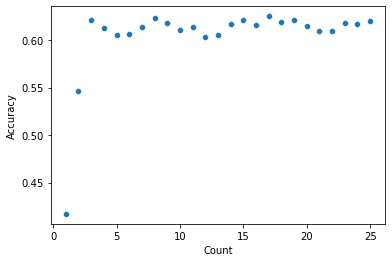

In [17]:
#Multiclass Random Forest Feature Number Selection

forest_features = pd.read_csv('rf_full.csv')
forest_features.drop('Unnamed: 0', axis=1, inplace=True)
forest_features.sort_values(by='Overall', ascending=False, inplace=True)
rkf = RepeatedKFold(n_splits=10, n_repeats=10)

feature_count = list(range(1, len(forest_features)+1))
accuracy = list()
for i in feature_count:
    feature_names = forest_features.loc[:i-1, 'names']
    features = npf[feature_names]
    target = npf['class']
    fold_accuracy = list()
    for train_index, test_index in rkf.split(features):
        features_train = features.iloc[train_index]
        features_test = features.iloc[test_index]
        target_train = target.iloc[train_index]
        target_test = target.iloc[test_index]

        model = RandomForestClassifier()
        model.fit(features_train, target_train)
        fold_accuracy.append(model.score(features_test, target_test))
    accuracy.append(np.array(fold_accuracy).mean())

count_table = pd.DataFrame()
count_table['Count'] = feature_count
count_table['Accuracy'] = accuracy

count_table.sort_values(by='Accuracy', ascending=False, inplace=True)
print(count_table)
plt.clf()
sns.scatterplot(data=count_table, x='Count', y='Accuracy')
plt.show()

In [18]:
#Multiclass Random Forest with Reduced Features

multiclass_n = 4 #number of features to take
target = npf['class']
multiclass_feature_names = forest_features.loc[:multiclass_n-1, 'names'].to_numpy() 
multiclass_features = npf[multiclass_feature_names]

param_grid = {
    'n_estimators':list(range(50, 1001, 50)),                       
    'max_features': ['auto','sqrt'], 
    'max_depth': list(range(50, 1001, 50))+[None],
    'min_samples_split': list(range(2, 11)),
    'min_samples_leaf': list(range(1, 11)),
    'bootstrap': [True,False]
}

RFC = RandomForestClassifier(n_jobs=-1)

grid = RandomizedSearchCV(RFC, cv=10, param_distributions=param_grid, n_iter=100)
grid.fit(features, target)

multiclass_random_forest_final_table=pd.DataFrame(grid.cv_results_)
multiclass_random_forest_final_table.sort_values(by=['rank_test_score', 'mean_test_score', 'std_test_score'], 
                                       ascending=(True, False, True), inplace=True)
multiclass_random_forest_final_table.reset_index(drop=True, inplace=True)
multiclass_random_forest_final_table.head()

multiclass_random_forest_final = multiclass_random_forest_final_table.loc[0]

In [19]:
multiclass_random_forest_final_table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.123372,0.044156,0.191654,0.010914,900,9,2,sqrt,400,False,...,0.673913,0.565217,0.695652,0.695652,0.673913,0.688889,0.533333,0.643961,0.054699,1
1,0.077032,0.003695,0.016853,0.001754,50,8,1,auto,450,False,...,0.652174,0.565217,0.652174,0.739130,0.673913,0.644444,0.533333,0.643865,0.056081,2
2,0.412932,0.015979,0.058584,0.002329,250,4,2,auto,700,False,...,0.630435,0.565217,0.717391,0.695652,0.630435,0.666667,0.555556,0.641787,0.059501,3
3,0.904717,0.029375,0.185139,0.031263,750,2,3,sqrt,700,False,...,0.630435,0.543478,0.673913,0.673913,0.673913,0.688889,0.533333,0.639614,0.054737,4
4,1.177220,0.045278,0.189612,0.006637,900,3,3,auto,1000,False,...,0.630435,0.565217,0.652174,0.695652,0.673913,0.666667,0.533333,0.639565,0.049556,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.150529,0.009159,0.025828,0.002090,100,5,4,sqrt,150,True,...,0.608696,0.608696,0.630435,0.652174,0.652174,0.622222,0.511111,0.606812,0.043185,96
96,0.900399,0.108925,0.169569,0.024098,800,8,10,sqrt,150,True,...,0.608696,0.565217,0.652174,0.630435,0.630435,0.622222,0.533333,0.604686,0.034417,97
97,0.185821,0.007462,0.030481,0.002051,100,3,9,sqrt,350,True,...,0.608696,0.565217,0.673913,0.652174,0.630435,0.622222,0.533333,0.604686,0.051931,97
98,0.184459,0.012409,0.030043,0.002383,100,2,4,sqrt,1000,True,...,0.565217,0.608696,0.630435,0.608696,0.673913,0.666667,0.533333,0.602609,0.043665,99


In [20]:
#Multiclass Random Forest - Test Data

test_data = pd.read_csv('npf_test_hidden.csv')
multiclass_test_features = test_data[multiclass_feature_names]

params = multiclass_random_forest_final[['param_n_estimators', 'param_min_samples_split', 'param_min_samples_leaf', 
                                         'param_max_features', 'param_max_depth', 'param_bootstrap']]

multiclass_RCF = RandomForestClassifier(n_jobs=-1, n_estimators = params[0], min_samples_split=params[1], 
                                    min_samples_leaf=params[2], max_features=params[3], max_depth=params[4], 
                                    bootstrap=params[5])
multiclass_RCF.fit(multiclass_features, npf['class'])
multiclass_output = pd.DataFrame()
multiclass_output['class4'] = multiclass_RCF.predict(multiclass_test_features)
multiclass_output['nonevent'] = np.array(multiclass_RCF.predict_proba(multiclass_test_features))[:, 3]
multiclass_output['p'] = np.ones(len(multiclass_output)) - np.array(multiclass_output['nonevent'])
multiclass_output.drop('nonevent', axis=1, inplace=True)

In [21]:
#Compute (Expected) Binary Accuracy of Multiclass Random Forest Classifier

accuracies = list()
features = npf[multiclass_feature_names]
target = npf['class']

binary_acc = list()
rkf = RepeatedKFold(n_splits=10, n_repeats=10)
for train_index, test_index in rkf.split(features):
    features_train = features.iloc[train_index]
    features_test = features.iloc[test_index]
    target_train = target.iloc[train_index]
    target_test = target.iloc[test_index]

    model = RandomForestClassifier(n_jobs=-1, n_estimators = params[0], min_samples_split=params[1], min_samples_leaf=params[2],
                                   max_features=params[3], max_depth=params[4], bootstrap=params[5])

    model.fit(features_train, target_train)
    
    train_predict = model.predict(features_test[multiclass_feature_names])
    train_check = pd.DataFrame()
    train_check['Prediction'] = train_predict
    train_check['True'] = target_test.values

    correct = 0
    for date in train_check.index:
        prediction = train_check.loc[date, 'Prediction']
        true = train_check.loc[date, 'True']
        if (prediction == 'nonevent' and true == 'nonevent') or (prediction != 'nonevent' and true != 'nonevent'):
            correct += 1

    binary_acc.append(correct/len(train_check))
    
binary_acc = np.array(binary_acc)
predicted_binary_accuracy = binary_acc.mean()
predicted_binary_accuracy

0.8282125603864734

In [22]:
output1 = [round(predicted_binary_accuracy, 2), 'class4'] + list(multiclass_output['class4'].values)
output2 = ['', 'p'] + list(multiclass_output['p'].values)
output = pd.DataFrame()
output['1'] = output1
output['2'] = output2
output.to_csv('prediction.csv', index=False, header=False)